# Homework 9
## Anggara Putra Pratama - 110117240

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.metrics import classification_report,accuracy_score
from keras.callbacks import ModelCheckpoint

In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [3]:
train

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [4]:
train.isnull().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

In [5]:
train.corr()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,1.000000,-0.011673,-0.027565,-0.059533,0.001639,-0.002419,-0.051818,0.061214,-0.039509,-0.070954,...,-0.040292,-0.005132,-0.043101,0.063337,-0.007915,-0.000823,0.026319,0.032873,0.024299,0.035396
margin1,-0.011673,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,-0.027565,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.059533,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,0.001639,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,-0.000823,0.035072,0.081069,-0.019850,-0.052317,0.006542,0.066262,-0.034094,0.048647,-0.028292,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,0.026319,-0.007581,-0.007057,0.084957,0.320644,-0.109229,-0.050498,-0.163375,-0.079283,0.088517,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,0.032873,-0.033159,-0.037405,-0.081999,-0.073886,0.151675,-0.031555,0.015391,-0.048843,-0.031954,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,0.024299,-0.075171,-0.098957,-0.148193,0.050970,0.022299,-0.132087,-0.001364,0.027758,-0.119494,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


In [6]:
Y=train.pop('species')

In [7]:
train.pop('id')

0         1
1         2
2         3
3         5
4         6
       ... 
985    1575
986    1578
987    1581
988    1582
989    1584
Name: id, Length: 990, dtype: int64

In [8]:
X=train.values

In [9]:
Y1=Y

## Normalize Input Features

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

## Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
Y= labelencoder_y.fit_transform(Y)

In [12]:
Y1=Y1.values.reshape(-1,1)

## One Hot Encoding for Neural Network

In [13]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y1 = ohe.fit_transform(Y1).toarray()
Y1.shape

(990, 99)

## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

## MLP Classifier

In [15]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=300,)
mlp = mlp.fit(X_train, y_train)
pred_mlp = mlp.predict(X_test)
print(classification_report(y_test,pred_mlp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         4
          17       1.00    

In [16]:
from sklearn.model_selection import train_test_split                 
x_train,x_test,y_train,y_test=train_test_split(X,Y1,shuffle=True,test_size=0.10,random_state=90)

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=90)

In [18]:
#Neural Network Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu,softmax,elu
from tensorflow.keras import layers
from tensorflow.keras import activations

In [19]:
y_train.shape

(801, 99)

## Normalize - Sigmoid

### 1. Sigmoid - Gradient Descent

In [20]:
gd_sigmoid = Sequential()
gd_sigmoid.add(Dense(128, input_dim=192,))
gd_sigmoid.add(Dense(256, activation='sigmoid'))
gd_sigmoid.add(Dense(99, activation='softmax'))

In [21]:
gd_sigmoid.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [22]:
checkpointer=ModelCheckpoint(filepath='Convolutional.hdf5',verbose=1,save_best_only=True)
sgd_sigmoid = gd_sigmoid.fit(x_train, y_train, epochs=950, batch_size=64,validation_data=(x_val,y_val))

Epoch 1/950
13/13 [==============================] - 2s 114ms/step - loss: 4.7455 - accuracy: 9.0738e-04 - val_loss: 4.7328 - val_accuracy: 0.0000e+00
Epoch 2/950
13/13 [==============================] - 0s 10ms/step - loss: 4.7228 - accuracy: 0.0020 - val_loss: 4.6899 - val_accuracy: 0.0000e+00
Epoch 3/950
13/13 [==============================] - 0s 18ms/step - loss: 4.6338 - accuracy: 4.8442e-04 - val_loss: 4.6512 - val_accuracy: 0.0000e+00
Epoch 4/950
13/13 [==============================] - 0s 13ms/step - loss: 4.6106 - accuracy: 0.0011 - val_loss: 4.6141 - val_accuracy: 0.0000e+00
Epoch 5/950
13/13 [==============================] - 0s 9ms/step - loss: 4.5654 - accuracy: 0.0064 - val_loss: 4.5804 - val_accuracy: 0.0222
Epoch 6/950
13/13 [==============================] - 0s 10ms/step - loss: 4.5206 - accuracy: 0.0205 - val_loss: 4.5469 - val_accuracy: 0.0222
Epoch 7/950
13/13 [==============================] - 0s 18ms/step - loss: 4.4862 - accuracy: 0.0246 - val_loss: 4.5167 - val

### 2. Sigmoid - Momentum

In [23]:
opt = tf.keras.optimizers.SGD(lr=0.01,momentum=0.9)
momen_sigmoid = Sequential()
momen_sigmoid.add(Dense(128, input_dim=192,))
momen_sigmoid.add(Dense(256, activation='sigmoid'))
momen_sigmoid.add(Dense(99, activation='softmax'))

In [24]:
momen_sigmoid.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [25]:
checkpointer=ModelCheckpoint(filepath='Convolutional.hdf5',verbose=1,save_best_only=True)
momentum_sigmoid = momen_sigmoid.fit(x_train, y_train, epochs=950, batch_size=64,validation_data=(x_val,y_val))

Epoch 1/950
13/13 [==============================] - 1s 48ms/step - loss: 4.7944 - accuracy: 0.0101 - val_loss: 4.6012 - val_accuracy: 0.0111
Epoch 2/950
13/13 [==============================] - 0s 22ms/step - loss: 4.4648 - accuracy: 0.0539 - val_loss: 4.4032 - val_accuracy: 0.0444
Epoch 3/950
13/13 [==============================] - 0s 15ms/step - loss: 4.2211 - accuracy: 0.1452 - val_loss: 4.1789 - val_accuracy: 0.1222
Epoch 4/950
13/13 [==============================] - 0s 14ms/step - loss: 3.9814 - accuracy: 0.3189 - val_loss: 3.9805 - val_accuracy: 0.2000
Epoch 5/950
13/13 [==============================] - 0s 15ms/step - loss: 3.7641 - accuracy: 0.4330 - val_loss: 3.7671 - val_accuracy: 0.2778
Epoch 6/950
13/13 [==============================] - 0s 13ms/step - loss: 3.5099 - accuracy: 0.5197 - val_loss: 3.5770 - val_accuracy: 0.3000
Epoch 7/950
13/13 [==============================] - 0s 12ms/step - loss: 3.2567 - accuracy: 0.5850 - val_loss: 3.3714 - val_accuracy: 0.3667
Epoch 

### 3. Sigmoid - Adam

In [26]:
adm_sigmoid = Sequential()
adm_sigmoid.add(Dense(128, input_dim=192,))
adm_sigmoid.add(Dense(256, activation='sigmoid'))
adm_sigmoid.add(Dense(99, activation='softmax'))

In [27]:
adm_sigmoid.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
checkpointer=ModelCheckpoint(filepath='Convolutional.hdf5',verbose=1,save_best_only=True)
adam_sigmoid = adm_sigmoid.fit(x_train, y_train, epochs=950, batch_size=64,validation_data=(x_val,y_val))

Epoch 1/950
13/13 [==============================] - 2s 48ms/step - loss: 4.6879 - accuracy: 0.0357 - val_loss: 4.1331 - val_accuracy: 0.1556
Epoch 2/950
13/13 [==============================] - 0s 18ms/step - loss: 3.8958 - accuracy: 0.2598 - val_loss: 3.6259 - val_accuracy: 0.3222
Epoch 3/950
13/13 [==============================] - 0s 16ms/step - loss: 3.3627 - accuracy: 0.5304 - val_loss: 3.1547 - val_accuracy: 0.5333
Epoch 4/950
13/13 [==============================] - 0s 13ms/step - loss: 2.8607 - accuracy: 0.7138 - val_loss: 2.7141 - val_accuracy: 0.6889
Epoch 5/950
13/13 [==============================] - 0s 13ms/step - loss: 2.3685 - accuracy: 0.8282 - val_loss: 2.2935 - val_accuracy: 0.8333
Epoch 6/950
13/13 [==============================] - 0s 14ms/step - loss: 1.9421 - accuracy: 0.8926 - val_loss: 1.9739 - val_accuracy: 0.8333
Epoch 7/950
13/13 [==============================] - 0s 15ms/step - loss: 1.6261 - accuracy: 0.9230 - val_loss: 1.6442 - val_accuracy: 0.9222
Epoch 

## Normalize - RELU

### 1. RELU - Gradient Descent

In [29]:
gd_relu = Sequential()
gd_relu.add(Dense(128, input_dim=192,))
gd_relu.add(Dense(256, activation='relu'))
gd_relu.add(Dense(99, activation='softmax'))

In [30]:
gd_relu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [31]:
sgd_relu = gd_relu.fit(x_train, y_train, epochs=950, batch_size=64,validation_data=(x_val,y_val))

Epoch 1/950
13/13 [==============================] - 1s 37ms/step - loss: 4.9097 - accuracy: 0.0222 - val_loss: 4.7862 - val_accuracy: 0.0000e+00
Epoch 2/950
13/13 [==============================] - 0s 15ms/step - loss: 4.6305 - accuracy: 0.0253 - val_loss: 4.5649 - val_accuracy: 0.0000e+00
Epoch 3/950
13/13 [==============================] - 0s 12ms/step - loss: 4.3661 - accuracy: 0.0462 - val_loss: 4.3667 - val_accuracy: 0.0222
Epoch 4/950
13/13 [==============================] - 0s 11ms/step - loss: 4.1828 - accuracy: 0.0744 - val_loss: 4.1850 - val_accuracy: 0.0556
Epoch 5/950
13/13 [==============================] - 0s 11ms/step - loss: 3.9988 - accuracy: 0.1190 - val_loss: 4.0094 - val_accuracy: 0.0889
Epoch 6/950
13/13 [==============================] - 0s 10ms/step - loss: 3.8365 - accuracy: 0.1531 - val_loss: 3.8446 - val_accuracy: 0.1444
Epoch 7/950
13/13 [==============================] - 0s 17ms/step - loss: 3.6218 - accuracy: 0.2356 - val_loss: 3.6886 - val_accuracy: 0.200

### 2. RELU - Momentum

In [32]:
opt = tf.keras.optimizers.SGD(lr=0.01,momentum=0.9)
momen_relu = Sequential()
momen_relu.add(Dense(128, input_dim=192, ))
momen_relu.add(Dense(256, activation='relu'))
momen_relu.add(Dense(99, activation='softmax'))

In [33]:
momen_relu.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [34]:
momentum_relu = momen_relu.fit(x_train, y_train, epochs=950, batch_size=64,validation_data=(x_val,y_val))

Epoch 1/950
13/13 [==============================] - 1s 38ms/step - loss: 4.7281 - accuracy: 0.0256 - val_loss: 3.9758 - val_accuracy: 0.1222
Epoch 2/950
13/13 [==============================] - 0s 23ms/step - loss: 3.4042 - accuracy: 0.2599 - val_loss: 2.9262 - val_accuracy: 0.3444
Epoch 3/950
13/13 [==============================] - 0s 20ms/step - loss: 2.1668 - accuracy: 0.6595 - val_loss: 2.0440 - val_accuracy: 0.6222
Epoch 4/950
13/13 [==============================] - 0s 16ms/step - loss: 1.2620 - accuracy: 0.8483 - val_loss: 1.2486 - val_accuracy: 0.7889
Epoch 5/950
13/13 [==============================] - 0s 20ms/step - loss: 0.7026 - accuracy: 0.9305 - val_loss: 0.7586 - val_accuracy: 0.9222
Epoch 6/950
13/13 [==============================] - 0s 14ms/step - loss: 0.4249 - accuracy: 0.9803 - val_loss: 0.5474 - val_accuracy: 0.9111
Epoch 7/950
13/13 [==============================] - 0s 22ms/step - loss: 0.2578 - accuracy: 0.9850 - val_loss: 0.4235 - val_accuracy: 0.9444
Epoch 

### 3. RELU - Adam

In [35]:
adm_relu = Sequential()
adm_relu.add(Dense(128, input_dim=192,))
adm_relu.add(Dense(256, activation='relu'))
adm_relu.add(Dense(99, activation='softmax'))

In [36]:
adm_relu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
adam_relu = adm_relu.fit(x_train, y_train, epochs=950, batch_size=64,validation_data=(x_val,y_val))

Epoch 1/950
13/13 [==============================] - 1s 33ms/step - loss: 4.5075 - accuracy: 0.0548 - val_loss: 3.3009 - val_accuracy: 0.3111
Epoch 2/950
13/13 [==============================] - 0s 9ms/step - loss: 2.6591 - accuracy: 0.5374 - val_loss: 2.0960 - val_accuracy: 0.7111
Epoch 3/950
13/13 [==============================] - 0s 9ms/step - loss: 1.3797 - accuracy: 0.8769 - val_loss: 1.1056 - val_accuracy: 0.8333
Epoch 4/950
13/13 [==============================] - 0s 9ms/step - loss: 0.5969 - accuracy: 0.9664 - val_loss: 0.5842 - val_accuracy: 0.9222
Epoch 5/950
13/13 [==============================] - 0s 10ms/step - loss: 0.2655 - accuracy: 0.9905 - val_loss: 0.3607 - val_accuracy: 0.9444
Epoch 6/950
13/13 [==============================] - 0s 8ms/step - loss: 0.1637 - accuracy: 0.9932 - val_loss: 0.2435 - val_accuracy: 0.9778
Epoch 7/950
13/13 [==============================] - 0s 14ms/step - loss: 0.0925 - accuracy: 0.9996 - val_loss: 0.2036 - val_accuracy: 0.9778
Epoch 8/95

## Normalize - ELU

### 1. ELU - Gradient Descent

In [38]:
gd_elu = Sequential()
gd_elu.add(Dense(128, input_dim=192,))
gd_elu.add(Dense(256, activation='elu'))
gd_elu.add(Dense(99, activation='softmax'))

In [39]:
gd_elu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [40]:
sgd_elu = gd_elu.fit(x_train, y_train, epochs=950, batch_size=64,validation_data=(x_val,y_val))

Epoch 1/950
13/13 [==============================] - 1s 30ms/step - loss: 4.8049 - accuracy: 0.0069 - val_loss: 4.5280 - val_accuracy: 0.0333
Epoch 2/950
13/13 [==============================] - 0s 8ms/step - loss: 4.3544 - accuracy: 0.0386 - val_loss: 4.1979 - val_accuracy: 0.0444
Epoch 3/950
13/13 [==============================] - 0s 8ms/step - loss: 3.9893 - accuracy: 0.0689 - val_loss: 3.9053 - val_accuracy: 0.1222
Epoch 4/950
13/13 [==============================] - 0s 8ms/step - loss: 3.6593 - accuracy: 0.1629 - val_loss: 3.6484 - val_accuracy: 0.1556
Epoch 5/950
13/13 [==============================] - 0s 9ms/step - loss: 3.4511 - accuracy: 0.2232 - val_loss: 3.4186 - val_accuracy: 0.2222
Epoch 6/950
13/13 [==============================] - 0s 9ms/step - loss: 3.1568 - accuracy: 0.3232 - val_loss: 3.2063 - val_accuracy: 0.3000
Epoch 7/950
13/13 [==============================] - 0s 9ms/step - loss: 2.8777 - accuracy: 0.4379 - val_loss: 3.0041 - val_accuracy: 0.3778
Epoch 8/950


### 2. ELU - Momentum

In [41]:
opt = tf.keras.optimizers.SGD(lr=0.01,momentum=0.9)
momen_elu = Sequential()
momen_elu.add(Dense(128, input_dim=192,))
momen_elu.add(Dense(256, activation='elu'))
momen_elu.add(Dense(99, activation='softmax'))

In [42]:
momen_elu.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [43]:
momentum_elu = momen_elu.fit(x_train, y_train, epochs=950, batch_size=64,validation_data=(x_val,y_val))

Epoch 1/950
13/13 [==============================] - 1s 25ms/step - loss: 4.8542 - accuracy: 0.0229 - val_loss: 3.4923 - val_accuracy: 0.2556
Epoch 2/950
13/13 [==============================] - 0s 7ms/step - loss: 3.0344 - accuracy: 0.3417 - val_loss: 2.1283 - val_accuracy: 0.5889
Epoch 3/950
13/13 [==============================] - 0s 7ms/step - loss: 1.5148 - accuracy: 0.7808 - val_loss: 1.2354 - val_accuracy: 0.8111
Epoch 4/950
13/13 [==============================] - 0s 7ms/step - loss: 0.7087 - accuracy: 0.9438 - val_loss: 0.7601 - val_accuracy: 0.8889
Epoch 5/950
13/13 [==============================] - 0s 7ms/step - loss: 0.3877 - accuracy: 0.9807 - val_loss: 0.4845 - val_accuracy: 0.9556
Epoch 6/950
13/13 [==============================] - 0s 6ms/step - loss: 0.2527 - accuracy: 0.9947 - val_loss: 0.3728 - val_accuracy: 0.9556
Epoch 7/950
13/13 [==============================] - 0s 6ms/step - loss: 0.1777 - accuracy: 0.9981 - val_loss: 0.3134 - val_accuracy: 0.9556
Epoch 8/950


### 3. ELU - Adam

In [44]:
adm_elu = Sequential()
adm_elu.add(Dense(128, input_dim=192,))
adm_elu.add(Dense(256, activation='relu'))
adm_elu.add(Dense(99, activation='softmax'))

In [45]:
adm_elu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
adam_elu = adm_elu.fit(x_train, y_train, epochs=950, batch_size=64,validation_data=(x_val,y_val))

Epoch 1/950
13/13 [==============================] - 1s 39ms/step - loss: 4.4744 - accuracy: 0.0627 - val_loss: 3.1375 - val_accuracy: 0.3889
Epoch 2/950
13/13 [==============================] - 0s 16ms/step - loss: 2.6384 - accuracy: 0.5675 - val_loss: 1.9821 - val_accuracy: 0.6222
Epoch 3/950
13/13 [==============================] - 0s 14ms/step - loss: 1.3421 - accuracy: 0.8530 - val_loss: 1.0873 - val_accuracy: 0.8222
Epoch 4/950
13/13 [==============================] - 0s 12ms/step - loss: 0.6029 - accuracy: 0.9595 - val_loss: 0.5681 - val_accuracy: 0.9111
Epoch 5/950
13/13 [==============================] - 0s 12ms/step - loss: 0.2622 - accuracy: 0.9865 - val_loss: 0.3663 - val_accuracy: 0.9444
Epoch 6/950
13/13 [==============================] - 0s 11ms/step - loss: 0.1407 - accuracy: 0.9979 - val_loss: 0.2903 - val_accuracy: 0.9444
Epoch 7/950
13/13 [==============================] - 0s 12ms/step - loss: 0.0999 - accuracy: 0.9948 - val_loss: 0.2469 - val_accuracy: 0.9444
Epoch 

## Simulation Result (Accuracy Performance)

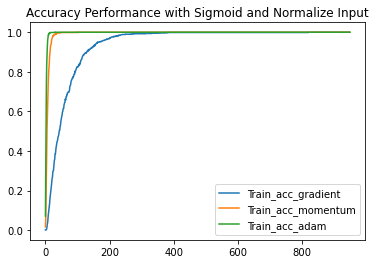

In [47]:
plt.plot(sgd_sigmoid.history['accuracy'])
plt.plot(momentum_sigmoid.history['accuracy'])
plt.plot(adam_sigmoid.history['accuracy'])
plt.title('Accuracy Performance with Sigmoid and Normalize Input')
plt.legend(['Train_acc_gradient', 'Train_acc_momentum','Train_acc_adam'], loc='lower right')
plt.show()

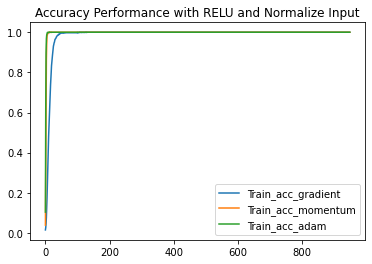

In [48]:
plt.plot(sgd_relu.history['accuracy'])
plt.plot(momentum_relu.history['accuracy'])
plt.plot(adam_relu.history['accuracy'])
plt.title('Accuracy Performance with RELU and Normalize Input')
plt.legend(['Train_acc_gradient', 'Train_acc_momentum','Train_acc_adam'], loc='lower right')
plt.show()

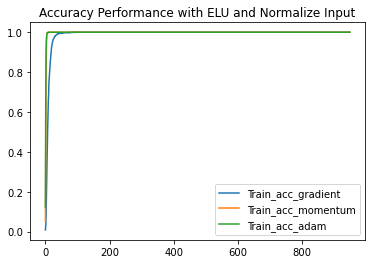

In [49]:
plt.plot(sgd_elu.history['accuracy'])
plt.plot(momentum_elu.history['accuracy'])
plt.plot(adam_elu.history['accuracy'])
plt.title('Accuracy Performance with ELU and Normalize Input')
plt.legend(['Train_acc_gradient', 'Train_acc_momentum','Train_acc_adam'], loc='lower right')
plt.show()

## Simulation Result (Loss Performance)

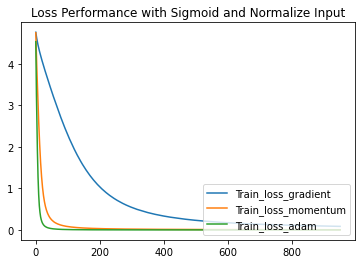

In [50]:
plt.plot(sgd_sigmoid.history['loss'])
plt.plot(momentum_sigmoid.history['loss'])
plt.plot(adam_sigmoid.history['loss'])
plt.title('Loss Performance with Sigmoid and Normalize Input')
plt.legend(['Train_loss_gradient', 'Train_loss_momentum','Train_loss_adam'], loc='lower right')
plt.show()

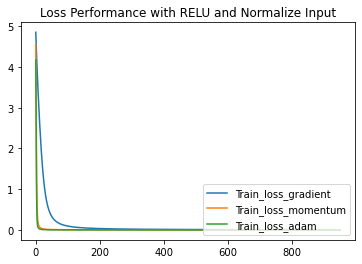

In [51]:
plt.plot(sgd_relu.history['loss'])
plt.plot(momentum_relu.history['loss'])
plt.plot(adam_relu.history['loss'])
plt.title('Loss Performance with RELU and Normalize Input')
plt.legend(['Train_loss_gradient', 'Train_loss_momentum','Train_loss_adam'], loc='lower right')
plt.show()

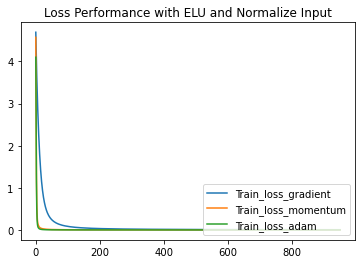

In [52]:
plt.plot(sgd_elu.history['loss'])
plt.plot(momentum_elu.history['loss'])
plt.plot(adam_elu.history['loss'])
plt.title('Loss Performance with ELU and Normalize Input')
plt.legend(['Train_loss_gradient', 'Train_loss_momentum','Train_loss_adam'], loc='lower right')
plt.show()